<a href="https://colab.research.google.com/github/MAAZAHMED306/Artificial_Intelligence/blob/master/NED_PGD_K_Means_Clustering_on_Credit_cards_Dataset_Assignment_Created_using_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')
# https://github.com/YuChenAmberLu/Data-Science--Credit-Card-Default/raw/master/UCI_Credit_Card.csv

In [2]:
# df = pd.read_csv("C:/Users/haris/Downloads/UCI_Credit_Card.csv")
# df.head()
!wget -O UCI_Credit_Card.csv "https://github.com/YuChenAmberLu/Data-Science--Credit-Card-Default/raw/master/UCI_Credit_Card.csv"

import pandas as pd

df = pd.read_csv("UCI_Credit_Card.csv")
df.head()


--2023-09-10 19:11:20--  https://github.com/YuChenAmberLu/Data-Science--Credit-Card-Default/raw/master/UCI_Credit_Card.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YuChenAmberLu/Data-Science--Credit-Card-Default/master/UCI_Credit_Card.csv [following]
--2023-09-10 19:11:20--  https://raw.githubusercontent.com/YuChenAmberLu/Data-Science--Credit-Card-Default/master/UCI_Credit_Card.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2862995 (2.7M) [text/plain]
Saving to: ‘UCI_Credit_Card.csv’

UCI_Credit_Card.csv 100%[===================>]   2.73M  --.-KB/s    in 0.04s   

2023-09-10 19:11:21

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,6.063298e-17,-6.063298e-17,2.330580e-16,6.252776e-17,-7.579123e-18,-1.856885e-16,-1.894781e-17,4.926430e-17,-5.494864e-17,3.126388e-17,...,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,-8.242296e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.731993e+00,-1.213794e+00,-1.234323e+00,-2.344743e+00,-2.973147e+00,-1.571479e+00,-1.764843e+00,-1.558876e+00,-1.532192e+00,-1.521944e+00,...,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,-5.329416e-01
25%,-8.659965e-01,-9.054983e-01,-1.234323e+00,-1.079457e+00,-1.057295e+00,-8.120745e-01,-8.749911e-01,-7.235699e-01,-6.966635e-01,-6.665987e-01,...,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,-5.329416e-01
50%,0.000000e+00,-2.118326e-01,8.101607e-01,1.858283e-01,8.585573e-01,-1.611565e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,...,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,-5.329416e-01
75%,8.659965e-01,5.589071e-01,8.101607e-01,1.858283e-01,8.585573e-01,5.982479e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,...,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,-5.329416e-01
max,1.731993e+00,6.416528e+00,8.101607e-01,5.246970e+00,2.774410e+00,4.720729e+00,7.133674e+00,6.794184e+00,6.823091e+00,7.031505e+00,...,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.876378e+00


In [5]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++', n_init=10)
kmeans.fit(data_scaled)


KMeans(n_clusters=2, n_init=10)

In [6]:
kmeans.inertia_

628480.1676030272

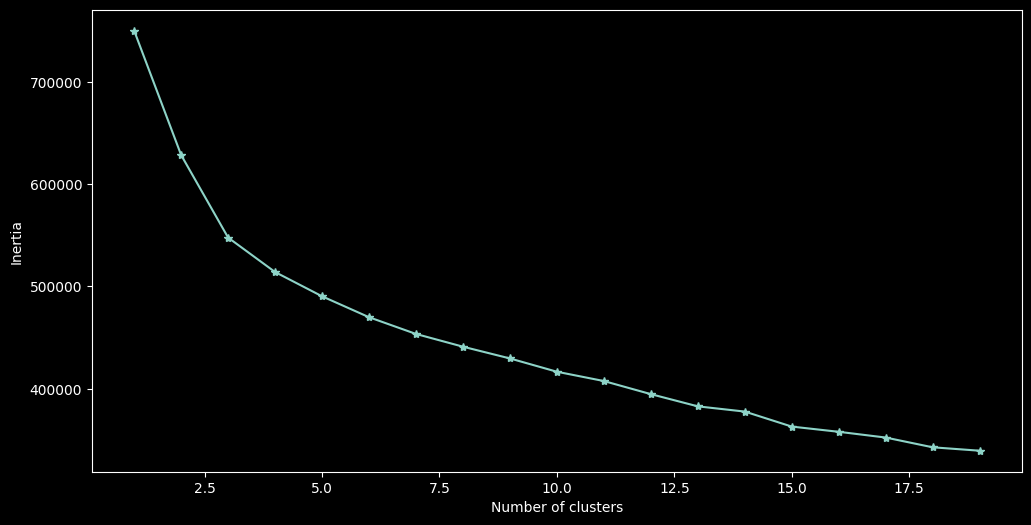

In [7]:
SSE = []
for i in range(1, 20):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10)  # Set n_init explicitly
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Converting the results into a DataFrame and plotting them
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [8]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++', n_init=10)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
pred


array([3, 3, 3, ..., 4, 3, 3], dtype=int32)

In [9]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    12221
1     9182
0     4478
4     3081
2     1038
Name: cluster, dtype: int64

In [10]:
dataset = df.copy()
dataset["cluster"] = pred

In [11]:
fig = px.scatter_3d(dataset, x="ID", y="BILL_AMT1", z="PAY_AMT1", color='cluster', size="ID", size_max=30)
fig.show()